<a href="https://colab.research.google.com/github/ayoubbensakhria/finance_algo/blob/master/WQU_650_Regression_PCA_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Financial Products

#### 1.1 What is an Exchange-Traded Fund (ETF)?
*  Exchange traded funds (ETFs) are financial instruments designed to replicate the movements of an index, sector, commodity, or other asset. Legally, they are similar to index funds. In Europe they are listed on the regulated Euronext markets. An ETF could be designed to track any data from the price of an individual commodity or a specific investment strategy to a huge and diverse collection of securities (Chien-Chiang and Chen).
* ETFs are similar in many ways to mutual funds, except that ETFs are bought and sold throughout the day on stock exchanges while mutual funds are bought and sold based on their price at day's end.

# 2. Import Data from csv

In [ ]:
# The complete Google Colab .ipynb project file: 
# https://colab.research.google.com/drive/10H6Z2vifdJFq0ne0iu7Ph1Ms8LHFaKIa?usp=sharing

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# for jupyter notebook running locally, change the csv path bellow to "data.csv"
data = pd.read_csv("/data.csv")
data.head()

# 3. 1-Dimensional Data Summaries

In [ ]:
data.describe()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,509.413056,247.079409,304.084643,2502.462738,121.925278,145.765476,143.522897,14216.931151,1187.467976,55.799127,943.752143,647.381905,4875.085000,141.988175,145.904444,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,66.154751,27.880897,35.676634,391.780333,9.374700,14.256886,11.913640,1520.792385,136.821780,5.813782,87.779355,72.874560,725.375215,16.532705,23.014514,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,357.160000,166.652000,216.880000,1482.970000,93.870000,113.790000,103.110000,10473.280000,873.940000,42.500000,723.880000,491.800000,2804.730000,104.950000,110.150000,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
25%,1320.741000,1773.735000,2730.897500,1125.265000,102.820000,86.830000,1589.772500,1901.960000,66.552500,7912.862500,458.612500,231.156500,275.670000,2270.745000,114.987500,136.160000,135.407500,13173.187500,1068.342500,51.652500,893.840000,594.925000,4571.815000,128.917500,130.095000,2509.495000,1224.482500,536.347500,1478.917525,1295.695000,99.715000,11769.345000,1131.110000,1937.375000,2242.712500
50%,1491.081000,2541.975000,3113.414050,1177.375000,130.635000,95.015000,1860.960000,1990.630000,78.710000,8227.805000,517.310000,251.165500,306.430000,2598.955000,124.120000,147.930000,144.645000,14342.610000,1230.790000,55.960000,953.660000,649.640000,4948.770000,143.675000,135.850000,2795.265000,1555.135000,594.125000,1666.280000,1351.055000,109.280000,12526.645000,1194.815000,2081.695000,2559.080000
75%,1656.015500,3138.222500,3460.390000,1241.797500,146.950000,100.512500,2116.162500,2076.865000,86.532500,8554.552500,557.265000,265.266750,329.432500,2768.245000,128.820000,155.667500,152.915000,15363.575000,1289.442500,60.390000,1012.940000,706.357500,5394.502500,151.240000,161.525000,2985.502500,1692.932500,643.987500,1728.582500,1403.500000,114.397500,12975.560000,1299.405000,2146.630000,2777.425000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,641.630000,322.457000,382.640000,3241.470000,136.780000,175.350000,166.640000,16997.400000,1403.520000,67.180000,1123.820000,781.630000,6145.470000,178.570000,205.440000,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


# 4. Data Visualizing

In [ ]:
data.Date = pd.to_datetime(data.Date)
cols = data.columns

In [ ]:
import plotly.express as px
def time_series_1(Fund_Name):
  fig = px.line(data, x="Date", y=Fund_Name, title=Fund_Name+" - time series")
  fig.show()

time_series_1(cols[1])

In [ ]:
import plotly.graph_objects as go

def time_series_2(S1, S2):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data["Date"], y=data[S1],
                      mode='lines', name=S1))
  fig.add_trace(go.Scatter(x=data["Date"], y=data[S2],
                      mode='lines', name=S2))
  fig.update_layout(title=S1 + ' vs ' + S2,
                    xaxis_title='Date (Year)',
                    yaxis_title='Fund Value')
  fig.show()

time_series_2(cols[1], cols[2])

# 5. 2-Dimensional Data Summaries

In [ ]:
# Compute the correlation using Pearson correlation
import seaborn as sb
import matplotlib.pyplot as plt
data.corr(method='pearson')

# plt.figure(figsize=(10,10))
# dataplot = sb.heatmap(data.corr(), cmap="PiYG")
# plt.show()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,-0.045439,0.677351,0.380714,0.601071,0.119269,0.167161,0.557645,0.193620,-0.152044,0.397034,0.224822,0.174025,0.859403,-0.346658,-0.734921,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,0.110893,0.678930,0.350046,0.510696,0.010117,0.015244,0.508243,0.218971,-0.203116,0.371382,0.188907,0.310811,0.759354,-0.336182,-0.713526,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,-0.312487,0.492296,0.222905,0.396939,-0.197143,-0.069617,0.359587,-0.111512,-0.424088,0.261513,-0.088410,-0.094217,0.823201,-0.485341,-0.727424,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,0.599384,0.508376,0.765606,0.624283,0.718873,0.921855,0.596349,0.735227,0.825480,0.703030,0.675393,0.540544,0.017388,0.771409,0.445050,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,0.550032,0.888062,0.813588,0.856685,0.591328,0.708573,0.801413,0.762312,0.454721,0.829645,0.764734,0.678859,0.605188,0.248228,-0.359425,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,1.000000,0.209736,-0.036849,-0.369143,-0.616392,-0.230014,0.581903,0.304030,0.487311,-0.067410,0.049484,0.416299,0.037509,-0.304333,0.376750,0.000366,-0.030710,0.899776,-0.434554,-0.744533,-0.046238,0.139077,-0.201364,0.444066,0.547095,0.724709,-0.302931,-0.500430,0.627655,-0.602246
MSCI BRAZIL,0.337350,0.260126,0.144240,0.755042,0.731040,0.209736,1.000000,0.732142,0.465766,-0.083163,0.562476,0.811979,0.910710,0.937938,0.556716,0.762449,0.609400,0.808712,0.654698,0.701297,0.606018,0.551653,0.294600,0.463748,0.043793,0.768825,0.865784,0.786482,0.810813,0.622795,0.631839,0.511825,0.426602,0.749572,0.408112
MSCI CANADA,0.133539,-0.047239,-0.114781,0.916125,0.562506,-0.036849,0.732142,1.000000,0.676746,0.335889,0.741687,0.555424,0.744150,0.615089,0.783045,0.902872,0.731081,0.771960,0.845175,0.663895,0.770054,0.708383,0.008069,0.806199,0.453717,0.820085,0.729537,0.849771,0.624717,0.541088,0.428865,0.857026,0.724269,0.623534,0.759718
MSCI CHINA,-0.192526,-0.000917,-0.449813,0.536852,0.438279,-0.369143,0.465766,0.676746,1.000000,0.602393,0.980782,0.377255,0.518319,0.337513,0.731391,0.667324,0.561679,0.755195,0.810124,0.517451,0.786816,0.891796,-0.217102,0.814460,0.518594,0.683251,0.578218,0.590822,0.440631,0.417123,0.114691,0.785007,0.705410,0.202909,0.822201
MSCI DENMARK,-0.676507,-0.474811,-0.616805,0.284185,-0.300536,-0.616392,-0.083163,0.335889,0.602393,1.000000,0.537414,-0.275134,-0.002492,-0.292335,0.370449,0.272837,0.101663,0.111802,0.499613,0.060431,0.268285,0.400754,-0.552746,0.750802,0.862406,0.116178,-0.117812,0.328008,-0.235455,-0.063860,-0.425734,0.654080,0.766011,-0.401304,0.763004


In [ ]:
# Recompute the calculation, instead of using Spearman correlation
data.corr(method='spearman')

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.760165,0.763908,0.008914,0.630077,0.728380,0.171258,0.014335,-0.116688,-0.538869,0.005798,0.554788,0.264879,0.364556,0.090323,0.124665,0.573083,0.139133,-0.235222,0.321589,0.243513,0.233873,0.752881,-0.341706,-0.565547,0.135903,0.284113,-0.189760,0.421563,0.386641,0.696801,-0.108966,-0.443921,0.646838,-0.445698
MSCI ARGENTINA,0.760165,1.000000,0.762681,-0.170967,0.543215,0.815686,0.189584,-0.174087,-0.049772,-0.421900,0.060285,0.605042,0.275518,0.412710,-0.093829,-0.036529,0.458203,0.175782,-0.343454,0.305101,0.113044,0.254280,0.776578,-0.411066,-0.719957,-0.085017,0.211169,-0.274679,0.416496,0.515793,0.611122,-0.263058,-0.502658,0.486479,-0.564665
BLP ORIENTE MEDIO,0.763908,0.762681,1.000000,-0.225116,0.305152,0.881598,0.022868,-0.222396,-0.415513,-0.453115,-0.295090,0.359850,0.124695,0.192335,-0.296949,-0.127153,0.328552,-0.178697,-0.520241,0.188173,-0.118720,-0.080790,0.712599,-0.491070,-0.661538,-0.270019,-0.103185,-0.373495,0.187038,0.241724,0.503483,-0.316342,-0.548127,0.382994,-0.668146
MSCI AUSTRALIA,0.008914,-0.170967,-0.225116,1.000000,0.522231,-0.222302,0.702757,0.936633,0.545906,0.408691,0.595389,0.543726,0.751379,0.606095,0.703204,0.918585,0.579334,0.764185,0.831537,0.703167,0.672674,0.540290,-0.085123,0.759239,0.486747,0.830269,0.706822,0.838601,0.689851,0.494837,0.493137,0.749297,0.714589,0.621821,0.727221
MSCI AUSTRIA,0.630077,0.543215,0.305152,0.522231,1.000000,0.368606,0.674107,0.472486,0.446277,-0.078353,0.554642,0.882219,0.790899,0.810203,0.526612,0.695327,0.797265,0.757600,0.351085,0.823141,0.760857,0.683685,0.570112,0.208147,-0.265385,0.712182,0.797891,0.403134,0.902973,0.726394,0.878057,0.324909,0.128467,0.846133,0.121610
MSCI BELGIUM,0.728380,0.815686,0.881598,-0.222302,0.368606,1.000000,0.014034,-0.221215,-0.307498,-0.368589,-0.190399,0.406781,0.124331,0.219109,-0.222442,-0.090045,0.351937,-0.077921,-0.461633,0.227466,-0.062708,0.001082,0.825553,-0.463197,-0.666000,-0.235713,-0.050673,-0.410777,0.238371,0.415367,0.527247,-0.300457,-0.530308,0.417859,-0.660276
MSCI BRAZIL,0.171258,0.189584,0.022868,0.702757,0.674107,0.014034,1.000000,0.615794,0.413264,0.104694,0.484752,0.780311,0.912577,0.946705,0.452480,0.724075,0.528819,0.784765,0.574307,0.729318,0.551163,0.473854,0.143528,0.416505,0.102561,0.689064,0.809696,0.769487,0.792500,0.567375,0.602130,0.425370,0.425297,0.595758,0.389331
MSCI CANADA,0.014335,-0.174087,-0.222396,0.936633,0.472486,-0.221215,0.615794,1.000000,0.635031,0.471316,0.675563,0.506866,0.691672,0.524926,0.718225,0.898737,0.633048,0.728359,0.850564,0.669726,0.723428,0.604681,-0.122878,0.816690,0.519158,0.813339,0.649712,0.809950,0.625193,0.486469,0.444318,0.817390,0.739852,0.604094,0.766393
MSCI CHINA,-0.116688,-0.049772,-0.415513,0.545906,0.446277,-0.307498,0.413264,0.635031,1.000000,0.608738,0.976460,0.444056,0.518441,0.412224,0.686739,0.618130,0.579344,0.720008,0.723093,0.539614,0.782682,0.882349,-0.106270,0.778314,0.436034,0.629511,0.535999,0.589147,0.485453,0.469770,0.282470,0.723844,0.689994,0.323534,0.751277
MSCI DENMARK,-0.538869,-0.421900,-0.453115,0.408691,-0.078353,-0.368589,0.104694,0.471316,0.608738,1.000000,0.564055,-0.017833,0.220099,0.028048,0.380487,0.428612,0.195366,0.286369,0.564102,0.281249,0.358074,0.428970,-0.309892,0.793448,0.660324,0.259644,0.009157,0.416429,0.080001,0.151474,-0.061556,0.676213,0.826300,-0.029171,0.733555


In [ ]:
# Recompute the calculation, instead of using Kendall correlation
data.corr(method='kendall')

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.558401,0.580861,0.026877,0.457578,0.533989,0.110099,0.052488,-0.058753,-0.365459,0.018689,0.385037,0.176063,0.264023,0.071664,0.099271,0.382076,0.103522,-0.149560,0.205503,0.162914,0.161897,0.576741,-0.194346,-0.385226,0.116739,0.192977,-0.093657,0.283916,0.277719,0.513574,-0.039841,-0.256976,0.461898,-0.277493
MSCI ARGENTINA,0.558401,1.000000,0.547910,-0.091383,0.382000,0.601097,0.158351,-0.084424,-0.022009,-0.242965,0.054548,0.442649,0.208696,0.305571,-0.040354,-0.003510,0.304788,0.145450,-0.163663,0.218027,0.072856,0.169170,0.568456,-0.221414,-0.506657,-0.013849,0.188740,-0.153292,0.289924,0.368595,0.408525,-0.144628,-0.281830,0.335863,-0.313350
BLP ORIENTE MEDIO,0.580861,0.547910,1.000000,-0.117454,0.234036,0.704980,0.030232,-0.115679,-0.250095,-0.306242,-0.165373,0.257325,0.108251,0.134969,-0.184527,-0.054750,0.217598,-0.076276,-0.331794,0.140562,-0.044213,-0.031688,0.549807,-0.314548,-0.436446,-0.116817,-0.046962,-0.190564,0.158721,0.173331,0.354054,-0.205743,-0.350679,0.263804,-0.425590
MSCI AUSTRALIA,0.026877,-0.091383,-0.117454,1.000000,0.340839,-0.131216,0.522182,0.785012,0.369162,0.297233,0.408538,0.366456,0.568113,0.424917,0.515197,0.750897,0.416622,0.557217,0.648032,0.506151,0.481422,0.378194,-0.055526,0.612213,0.381760,0.625075,0.497304,0.665802,0.483075,0.331800,0.303170,0.575557,0.566744,0.433455,0.599336
MSCI AUSTRIA,0.457578,0.382000,0.234036,0.340839,1.000000,0.273741,0.485153,0.324764,0.400430,-0.047307,0.476937,0.713321,0.603883,0.624039,0.389854,0.486281,0.608685,0.544793,0.247415,0.629914,0.586635,0.590032,0.408816,0.186838,-0.192600,0.516966,0.592205,0.284160,0.744375,0.547996,0.704005,0.250830,0.113558,0.677165,0.117130
MSCI BELGIUM,0.533989,0.601097,0.704980,-0.131216,0.273741,1.000000,0.022485,-0.126279,-0.180685,-0.238232,-0.098045,0.295130,0.100666,0.151199,-0.117383,-0.031694,0.270840,-0.011353,-0.278965,0.180898,-0.019261,0.015718,0.629750,-0.293025,-0.443330,-0.104837,-0.023403,-0.244746,0.178684,0.303163,0.415143,-0.189592,-0.321505,0.321089,-0.430069
MSCI BRAZIL,0.110099,0.158351,0.030232,0.522182,0.485153,0.022485,1.000000,0.452413,0.319757,0.097704,0.361661,0.592149,0.741059,0.801429,0.326376,0.527601,0.376384,0.585910,0.430722,0.528843,0.379775,0.340617,0.103586,0.313243,0.088733,0.503889,0.641286,0.581737,0.588354,0.390666,0.405806,0.298236,0.326667,0.410042,0.321634
MSCI CANADA,0.052488,-0.084424,-0.115679,0.785012,0.324764,-0.126279,0.452413,1.000000,0.446180,0.324670,0.484608,0.352153,0.519589,0.372984,0.527324,0.733227,0.463601,0.530703,0.662746,0.482922,0.520554,0.442245,-0.067097,0.639514,0.370363,0.621451,0.466997,0.638462,0.440625,0.331916,0.295318,0.636375,0.559896,0.443875,0.594890
MSCI CHINA,-0.058753,-0.022009,-0.250095,0.369162,0.400430,-0.180685,0.319757,0.446180,1.000000,0.430686,0.883671,0.387781,0.409322,0.365292,0.499020,0.441229,0.422011,0.592967,0.557804,0.399772,0.580482,0.711381,-0.062105,0.595408,0.339015,0.452568,0.430534,0.424741,0.451658,0.351479,0.249545,0.540665,0.510854,0.281495,0.587971
MSCI DENMARK,-0.365459,-0.242965,-0.306242,0.297233,-0.047307,-0.238232,0.097704,0.324670,0.430686,1.000000,0.389046,0.009075,0.190103,0.038260,0.250727,0.318875,0.132186,0.175741,0.401252,0.222201,0.230458,0.283383,-0.187694,0.608652,0.503494,0.164675,0.009075,0.282869,0.075414,0.124045,-0.035765,0.492127,0.632686,-0.011257,0.554733


# 6. Data Selection

In [ ]:
# Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)
response_variable = "LUXXX"

# 7. Principal Component Analysis

In [ ]:
X_data = data.drop(['Date'], axis=1)
Y = data[response_variable]

In [ ]:
corr = data.corr(method='pearson')

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components=5)
  
pca.fit(corr)
X = pca.transform(X_data)  
explained_variance = pca.explained_variance_ratio_.cumsum()
explained_variance

array([0.69253938, 0.96655996, 0.98552078, 0.99308592, 0.99640588])

In [ ]:
pd.DataFrame(pca.components_,columns=X_data.columns)

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,0.248505,0.231445,0.272552,-0.123477,0.094514,0.270147,-0.006237,-0.126170,-0.186732,-0.259240,-0.154814,0.115370,0.004925,0.086202,-0.119081,-0.101107,0.024611,-0.066696,-0.188859,0.013515,-0.086872,-0.091510,0.251196,-0.240355,-0.289909,-0.092788,-0.016066,-0.153607,0.067962,0.083920,0.162988,-0.202680,-0.254745,0.120003,-0.270667
1,-0.131067,-0.096183,-0.041607,-0.167858,-0.239306,-0.076174,-0.221178,-0.165066,-0.115404,0.084512,-0.137658,-0.218784,-0.219244,-0.232050,-0.158903,-0.196145,-0.164821,-0.223038,-0.151921,-0.199727,-0.187721,-0.149213,-0.105218,-0.077617,0.063147,-0.227292,-0.248859,-0.161645,-0.245526,-0.167721,-0.197440,-0.095452,-0.056219,-0.221540,-0.067619
2,0.053487,0.326078,-0.017130,-0.293209,0.101693,-0.016882,-0.237112,-0.112847,0.327106,0.199776,0.314566,0.024325,-0.132438,-0.148036,0.138849,-0.095945,0.217305,0.027806,-0.017888,0.032486,0.211002,0.385456,0.061511,0.027003,-0.086030,-0.066116,-0.095155,-0.307843,-0.035566,0.127819,-0.019219,0.066422,-0.089599,-0.132047,0.012219
3,0.149612,-0.089891,0.277497,0.175451,-0.038716,0.231134,-0.182904,0.154593,-0.181121,0.164088,-0.130264,-0.130212,-0.032800,-0.156390,0.134397,0.195291,0.322660,-0.248727,-0.095094,0.217185,0.097448,-0.009137,0.111443,0.181207,0.104974,-0.119798,-0.305374,-0.002355,-0.086702,-0.118705,0.213632,0.271272,0.160342,0.108741,0.008009
4,-0.193010,0.239694,0.194240,0.004977,-0.167284,0.127523,0.202418,-0.013242,0.065773,0.297449,0.084109,0.234941,0.290357,0.136299,-0.328688,-0.078833,0.032602,-0.024115,-0.081936,0.071321,-0.209812,0.018180,0.051507,0.085461,0.187428,-0.284026,-0.158592,0.197140,-0.012203,0.338197,-0.068656,-0.007189,0.146426,-0.147027,-0.004306


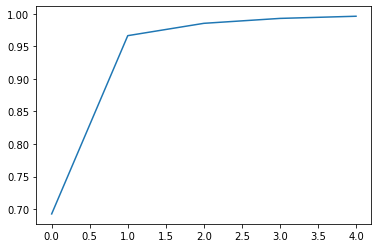

96.7 % of variance explained by 2 components.


In [ ]:
# plot  explained_variance
plt.plot(explained_variance)
plt.show()

pca_80 = PCA(.80)
pca_80.fit(corr).transform(X_data)  
print(round(pca_80.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_80.n_components_,
      "components.")

#### 7.3 How many components are needed to express 80% of the variation of the data?
* As we can see from the components variance, Only **2 components** are enough to get 84.7% of variance in data.

#### 7.4 What is your interpretation of the 1st component?
* First component itself is capable to diffrentiate 51% of the data, which clearly indicates its significance.

# 8. We will use PCA and the lasso regression

#### 8.1 What do these 2 methodologies have in common?
* PCA and Lasso regressions both techniques can be used for feature selection. If we want to select best correlated features with response variable, both could be used.

#### 8.2 How do these 2 methodologies differ?
* **PCA for dimentiality reduction:** PCA reducing the number of features does not take into consideration the class labels. The only thing that it cares about is preserving the maximum variance which may not always be optimal for classification tasks. PCA can be used as a dimensionality reduction technique if you drop Principal Components based on a heuristic, but it offers no feature selection, as the Principal Components are retained instead of the original features.
* **Lasso for feature selection:** LASSO on the other hand pushes those features that do not have much correlation with the class labels towards zero. Hence, L1-Reg strives to reduce the number of features while also getting good classification performance. It intrinsically, perform feature selection as the coefficients of predictors are shrunk towards zero. It still requires hyperparameter tuning because there's a regularization coefficient that weights how severe is the regularization of the loss function.



# 9. PCA Regression and Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.33, random_state=31)
lasso = Lasso(alpha=0.1, max_iter=1000)
lasso.fit(X_train, y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print("Train score : ", train_score)
print("Test score : ", test_score)

Train score :  0.9446590907047543
Test score :  0.9456230797105261


# 10. Lasso Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X = data.drop(['Date', response_variable], axis=1)
Y = data[response_variable]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

train = []
test = []
alphas = np.arange(0,2,0.001)

for alpha in alphas:
  lasso = Lasso(alpha=alpha, max_iter=1000)
  lasso.fit(X_train, y_train)
  train.append(lasso.score(X_train, y_train))
  test.append(lasso.score(X_test, y_test))
  # print(alpha)
  if alpha==1:
    importance = np.abs(lasso.coef_)
    importance

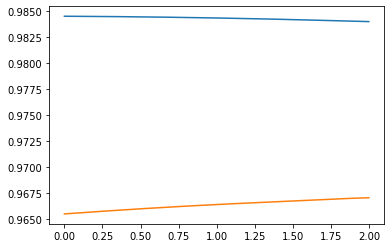

In [ ]:
plt.plot(alphas, train, alphas, test)

In [ ]:
lasso = Lasso(alpha=1, max_iter=1000, normalize=True)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.          0.06387091 -0.          0.          0.          0.
  0.         -0.         -0.03511483  0.          0.          0.
  0.          0.         -0.          6.28798926 -0.         -0.
 -0.          0.          0.          0.05210532 -0.         -0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.64953419  0.32786298 -0.        ]


In [ ]:
coef_dict = {}
for coef, feat in zip(lasso.coef_, X.columns):
  if coef != 0:
    coef_dict[feat] = coef

In [ ]:
coef_dict

{'BLP ORIENTE MEDIO': 0.0638709089523018,
 'MSCI DENMARK': -0.03511482964188396,
 'MSCI GERMANY': 6.287989262995154,
 'MSCI MEXICO': 0.052105319477637226,
 'MSCI SWITZERLAND': -0.6495341925536231,
 'MSCI UK': 0.3278629844334463}

In [ ]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

print("Train score : ", train_score)
print("Test score : ", test_score)

Train score :  0.9398185514051836
Test score :  0.9249258023994829
